In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\rouna\Downloads\LM Assignment(1,17,19)\property_data_update.csv", index_col=None)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
data.head(10)

address  zip_code  residential_units  total_units  \
0    327 EAST 3 STREET, 1C   10009.0                1.0          1.0   
1  327 EAST 3RD STREET, 5A   10009.0                1.0          1.0   
2    327 EAST 3 STREET, 2E   10009.0                1.0          1.0   
3  317 EAST 3RD STREET, 12   10009.0                1.0          1.0   
4  311 EAST 3RD STREET, 17   10009.0                1.0          1.0   
5         311 EAST 3RD, 22   10009.0                1.0          1.0   
6   742 EAST 6TH STREET, 1   10009.0                1.0          1.0   
7      244 EAST 7TH STREET   10009.0                1.0          1.0   
8   623 EAST 6TH STREET, 8   10009.0                2.0          2.0   
9   621 EAST 6TH STREET, 6   10009.0                3.0          3.0   

   plot_size  total_builtup_area  age_property  dist_landmarks  \
0     2000.0              2700.0          12.0       34.700000   
1     1185.0              1264.0         104.0       34.618500   
2     2143.0              1700.0          12.0       36.514300   
3     2500.0               600.0         105.0       31.355000   
4     1275.0              2294.0          97.0       32.127500   
5     2650.0              2650.0          97.0       35.431667   
6     3000.0              1120.0          97.0       30.466667   
7     2300.0              2080.0          10.0       35.230000   
8     1070.0              1656.0         116.0       39.440333   
9     1704.0              2592.0         116.0       36.384567   

   dist_postoffice   sell_price  House Sold  
0        104.069137    675000.0         0.0  
1         16.203313    765000.0         0.0  
2         32.764258    819000.0         0.0  
3        109.590097    453150.0         0.0  
4          7.506365    480000.0         1.0  
5         31.192435    665000.0         1.0  
6         71.435221    635000.0         0.0  
7         59.821965    750000.0         0.0  
8         54.489219    700000.0         0.0  
9        114.186279    816425.0         0.0

In [5]:
data.columns

Index(['address', 'zip_code', 'residential_units', 'total_units', 'plot_size',
       'total_builtup_area', 'age_property', 'dist_landmarks',
       'dist_postoffice ', 'sell_price', 'House Sold'],
      dtype='object')

In [6]:
data.describe().round(2)

zip_code  residential_units  total_units  plot_size  \
count  10873.00           10873.00     10873.00   10873.00   
mean    9872.03               1.49         1.52    2680.44   
std     1222.19               0.62         0.62     891.12   
min        0.00               0.00         1.00     200.00   
25%    10011.00               1.00         1.00    2000.00   
50%    10017.00               1.00         1.00    2500.00   
75%    10025.00               2.00         2.00    3292.00   
max    10463.00               4.00         4.00    4998.00   

       total_builtup_area  age_property  dist_landmarks  dist_postoffice   \
count            10873.00      10873.00        10873.00          10873.00   
mean              1668.16         71.12           32.87             53.14   
std                520.05         30.56            4.70             37.43   
min                  0.00          1.00           23.01              2.64   
25%               1280.00         55.00           29.33             24.29   
50%               1600.00         77.00           32.57             44.78   
75%               2023.00         92.00           36.25             72.83   
max               2999.00        147.00           45.07            340.43   

       sell_price  House Sold  
count    10873.00     10873.0  
mean    588202.40         0.5  
std     116821.83         0.5  
min     415000.00         0.0  
25%     485000.00         0.0  
50%     570000.00         1.0  
75%     680000.00         1.0  
max     830000.00         1.0

In [7]:
data.describe(include='object').T

count unique            top freq
address  10873   6607  30 PARK PLACE   90

We have two features 'address' and 'zip_code' which represent the geo location of the property,we are not going to use these features for the current anaylsis. 

In [8]:
data.drop(['zip_code','address'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10874 entries, 0 to 10873
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   residential_units   10873 non-null  float64
 1   total_units         10873 non-null  float64
 2   plot_size           10873 non-null  float64
 3   total_builtup_area  10873 non-null  float64
 4   age_property        10873 non-null  float64
 5   dist_landmarks      10873 non-null  float64
 6   dist_postoffice     10873 non-null  float64
 7   sell_price          10873 non-null  float64
 8   House Sold          10873 non-null  float64
dtypes: float64(9)
memory usage: 764.7 KB


In [10]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
data.isnull().sum() 

residential_units     1
total_units           1
plot_size             1
total_builtup_area    1
age_property          1
dist_landmarks        1
dist_postoffice       1
sell_price            1
House Sold            1
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

residential_units  total_units  plot_size  total_builtup_area  \
6750                NaN          NaN        NaN                 NaN   

      age_property  dist_landmarks  dist_postoffice   sell_price  House Sold  
6750           NaN             NaN               NaN         NaN         NaN

In [13]:
data.dropna(inplace=True) # We have a blank row in the dataset 
data.isnull().sum() 


residential_units     0
total_units           0
plot_size             0
total_builtup_area    0
age_property          0
dist_landmarks        0
dist_postoffice       0
sell_price            0
House Sold            0
dtype: int64

#### Univariate analysis- 

In [14]:
data.columns

Index(['residential_units', 'total_units', 'plot_size', 'total_builtup_area',
       'age_property', 'dist_landmarks', 'dist_postoffice ', 'sell_price',
       'House Sold'],
      dtype='object')

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


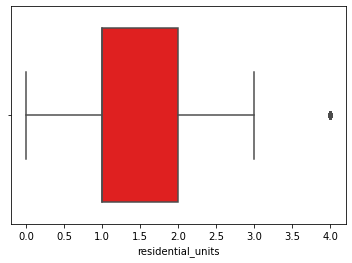

In [15]:
sns.boxplot(data['residential_units'], color="red") 
plt.show()

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


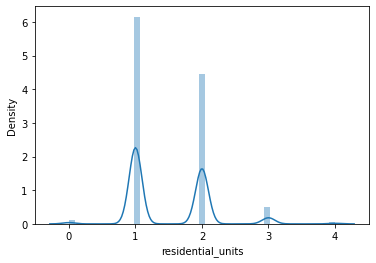

In [16]:
sns.distplot(data['residential_units'],kde=True)
plt.show()

In [17]:
data['residential_units'].describe()

count    10873.000000
mean         1.487078
std          0.617714
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: residential_units, dtype: float64

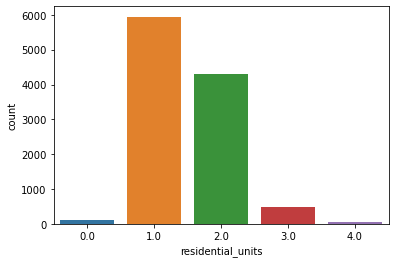

In [18]:
sns.countplot(x= data.residential_units)
plt.show()

In [19]:
data['residential_units'].skew().round(3)

0.759

In [20]:
data['residential_units'].kurt().round(3)

0.45

In [21]:
data.residential_units.value_counts()

1.0    5944
2.0    4305
3.0     477
0.0     101
4.0      46
Name: residential_units, dtype: int64

#### Inferences - 
 
1. Min value is 0 while Max is 4. 
2. Most number of buildings have either 1 or 2 residential units. Very few have as high as 4 residential units. 
3. Buildings with 4 Residential units are outliers. 

### 2. Total Units 

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


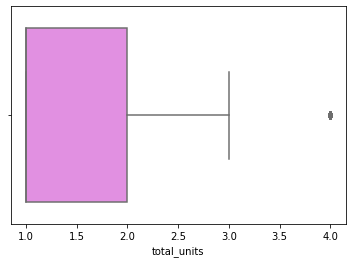

In [22]:
sns.boxplot(data['total_units'], color="violet") 
plt.show()


C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


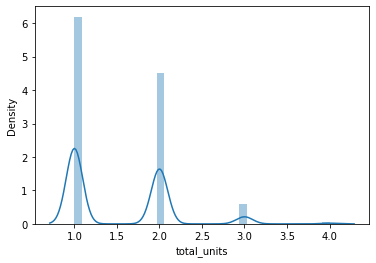

In [23]:
sns.distplot(data['total_units'],kde=True)
plt.show()

In [24]:
data['total_units'].describe()

count    10873.000000
mean         1.515681
std          0.619434
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: total_units, dtype: float64

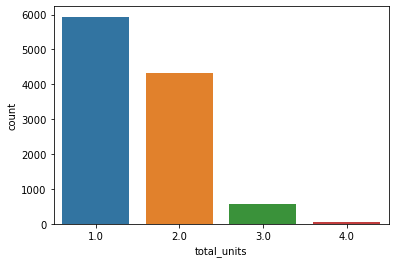

In [25]:
sns.countplot(x= data['total_units'])
plt.show()

In [26]:
data['total_units'].skew().round(3)

0.918

In [27]:
data['total_units'].kurt().round(3)

0.458

#### Total Units  -  
1. Min value is 1 while Max is 4. 
2.  Similar to residential units, most number of buildings have either 1 or 2 Total Units. Very few have as high as 4 total units. 
3. Buildings with 4 Total units are outliers. 

### 3. Plot Size ( Sq. Feet) 

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


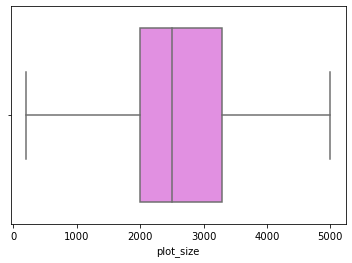

In [28]:
sns.boxplot(data['plot_size'], color="violet") 
plt.show()


C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


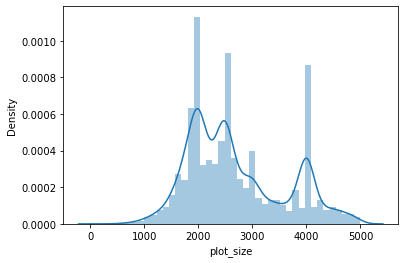

In [29]:
sns.distplot(data['plot_size'],kde=True)
plt.show()

In [30]:
data['plot_size'].describe()

count    10873.000000
mean      2680.435850
std        891.121548
min        200.000000
25%       2000.000000
50%       2500.000000
75%       3292.000000
max       4998.000000
Name: plot_size, dtype: float64

In [31]:
data['plot_size'].skew().round(3)

0.606

In [32]:
data['plot_size'].kurt().round(3)

-0.57

#### Plot Size  -  
1. Min value is 200 sq feet while Max is close to 5000 sq feet. 
2. Mean of 2680 is higher than the Median value 2500. With std. deviation of 891, the CV is close to 0.3, thus low variation present. 
3. Clearly a Multimodal distribution, with peaks at approx. 2000, 2500 and 4000 sq. feet levels. 
4. No outliers present in the distribution. 

### 4. Total Builtup Area

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


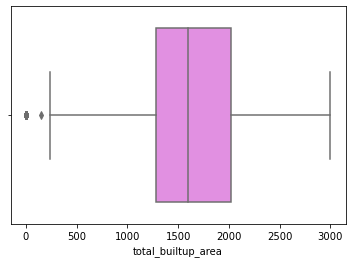

In [33]:
sns.boxplot(data['total_builtup_area'], color="violet") 
plt.show()


C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


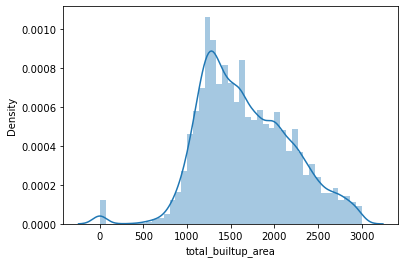

In [34]:
sns.distplot(data['total_builtup_area'],kde=True)
plt.show()

In [35]:
data['total_builtup_area'].describe()

count    10873.000000
mean      1668.158558
std        520.051835
min          0.000000
25%       1280.000000
50%       1600.000000
75%       2023.000000
max       2999.000000
Name: total_builtup_area, dtype: float64

In [36]:
data['total_builtup_area'].skew().round(3)

0.23

In [37]:
data['total_builtup_area'].kurt().round(3)

0.067

#### Total Builtup Area  -  
1. Min value is 0 sq feet(Odd)  while Max is close to 3000 sq feet. 
2. Mean of 1668 is approx. equal to Median value 1680. With std. deviation of 520, the CV is again close to 0.3, thus low variation present. 
3. Few outliers present in the left tail of the distribution. (Values lesser than Mean) 

### 5. Age Property 

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


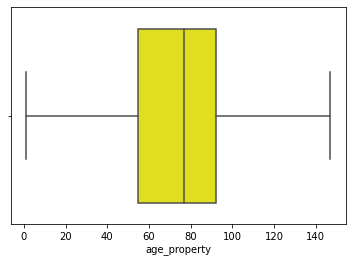

In [38]:
sns.boxplot(data['age_property'], color="yellow") 
plt.show()


C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


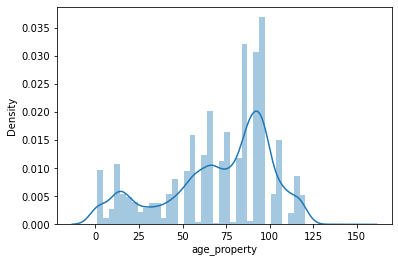

In [39]:
sns.distplot(data['age_property'],kde=True)
plt.show()

In [40]:
data['age_property'].describe()

count    10873.000000
mean        71.116803
std         30.557768
min          1.000000
25%         55.000000
50%         77.000000
75%         92.000000
max        147.000000
Name: age_property, dtype: float64

In [41]:
data['age_property'].skew().round(3)

-0.72

In [42]:
data['age_property'].kurt().round(3)

-0.396

#### Age Property  -  
1. Min age of properties is 1 yrs while the oldest buildings have age close to 147 yrs.  
2. Mean of 71 yrs is approx. equal to Median value 77. With std. deviation of 30, the CV is close to 0.42, thus higher variation than plot_size and total_builtup_area. 
3. No outliers present in the distribution.
4. Age can also be considered a Multimodal distribution, with three peaks at approx. 90-100 yrs, 50-75yrs and 0-25 yrs levels. 

### 6. Dist Landmarks 

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


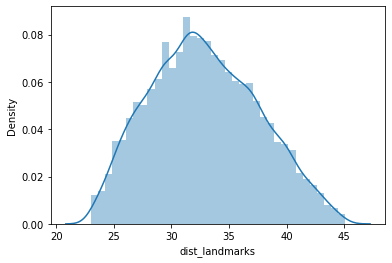

In [43]:
sns.distplot(data['dist_landmarks'],kde=True)
plt.show()



C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


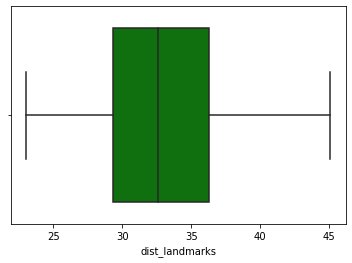

In [44]:
sns.boxplot(data['dist_landmarks'], color="green") 
plt.show()


In [45]:
data['dist_landmarks'].describe()

count    10873.000000
mean        32.873595
std          4.696109
min         23.011833
25%         29.329700
50%         32.573333
75%         36.250000
max         45.066667
Name: dist_landmarks, dtype: float64

In [46]:
data['dist_landmarks'].skew().round(3)

0.195

In [47]:
data['dist_landmarks'].kurt().round(3)

-0.63

#### Distance to Landmarks  -  
1. Min distance is 23 miles while the max distance is 45 miles.   
2. Mean of 32.8 is approx. equal to Median value 32.5. With std. deviation of 4.6, the CV is close to 0.13, thus lowest variation so far.  
3. No outliers present in the distribution.
4. With a fair bit of approximation, Distance to landmarks can be considered as a Symmetric distribution.  

### 7. Dist Postoffice 

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


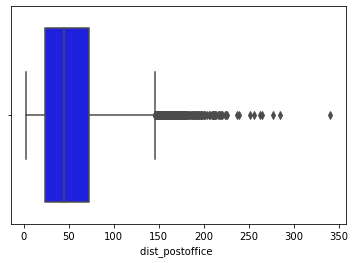

In [48]:
sns.boxplot( data['dist_postoffice '], color="blue") 
plt.show()

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


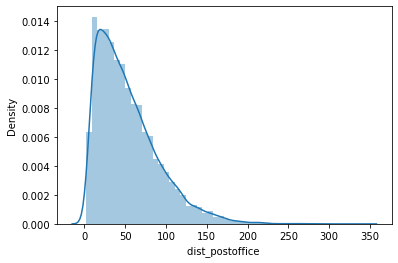

In [49]:
sns.distplot( data['dist_postoffice '],kde=True)
plt.show()

In [50]:
data['dist_postoffice '].describe()

count    10873.000000
mean        53.141183
std         37.434208
min          2.636149
25%         24.288220
50%         44.784438
75%         72.826716
max        340.428964
Name: dist_postoffice , dtype: float64

In [51]:
data['dist_postoffice '].skew()

1.2621230529825238

In [52]:
data['dist_postoffice '].kurt()

2.121505180236541

#### Distance to Post office  -  
1. Min distance is 2.6 miles while the max distance is 340 miles.   
2. Mean of 53.14 is greater than Median value 44.7. With std. deviation of 37.43, the CV is close to 0.7, thus highest variation so far.  
3. Few outliers are present in the right tail of the distribution. (Percentage outliers will be analyzed in subsequent sections)
4. Positive skewness evident from the long right tail, skewness is 1.26 .  

### 8. Sell Price - Target Variable 

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


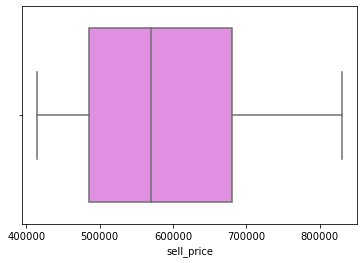

In [53]:
sns.boxplot( data['sell_price'], color="violet") 
plt.show()

C:\Users\rouna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


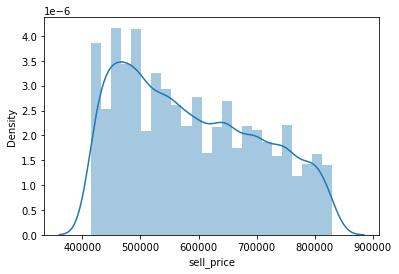

In [54]:
sns.distplot( data['sell_price'],kde=True)
plt.show()

In [55]:
data['sell_price'].describe()

count     10873.000000
mean     588202.403201
std      116821.830617
min      415000.000000
25%      485000.000000
50%      570000.000000
75%      680000.000000
max      830000.000000
Name: sell_price, dtype: float64

In [56]:
data['sell_price'].skew()

0.34909009981946826

In [57]:
data['sell_price'].kurt()  

-1.0397968764249301

#### Distance to Post office  -  
1. Min sell price is 415000 USD while the max is 830000 USD.   
2. Mean of 588202 is approx. equal to Median value 570000. With std. deviation of 116821, the CV is close to 0.2, thus low variation present.  
3. No outliers are present in the distribution.
4. Sell price has Negative kurtosis, i.e. platykurtic distribution.( Reference Kurtosis for Normal is 0.0 in pandas kurt() function)

### Analysis of Variation - 
The coefficient of variation (relative standard deviation) is a statistical measure of the dispersion of data points around the mean. Higher value indicates greater spread. It can be used to compare variation among data series with different means. 

In [58]:
CV_data = pd.DataFrame(data = [data.std().values,data.mean().values,data.std().values/data.mean().values] , columns=data.columns , index = ['Std Dev','Mean','CV'] ).T

In [59]:
CV_data.sort_values(by='CV',ascending=False).round(3)

Std Dev        Mean     CV
House Sold               0.500       0.501  0.998
dist_postoffice         37.434      53.141  0.704
age_property            30.558      71.117  0.430
residential_units        0.618       1.487  0.415
total_units              0.619       1.516  0.409
plot_size              891.122    2680.436  0.332
total_builtup_area     520.052    1668.159  0.312
sell_price          116821.831  588202.403  0.199
dist_landmarks           4.696      32.874  0.143

Dist_Postoffice has the highest value of Coeffecient of Variation at 0.704, while dist_landmarks has the lowest CV of 0.143.

### Percentage Outliers - 

In [60]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100).round(2),columns=['Outliers %'])

Outliers %
residential_units         0.42
total_units               0.52
plot_size                 0.00
total_builtup_area        0.83
age_property              0.00
dist_landmarks            0.00
dist_postoffice           2.62
sell_price                0.00
House Sold                0.00

As the percentage outliers are very low (2.62% being the highest), we will not be doing outlier treatment or removal for the current analysis. An outlier percentage of order of 15-20% is a cause for concern thus must be thoroughly investigated. 

### Multivariate Analysis - 

### Pair plot- 
A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

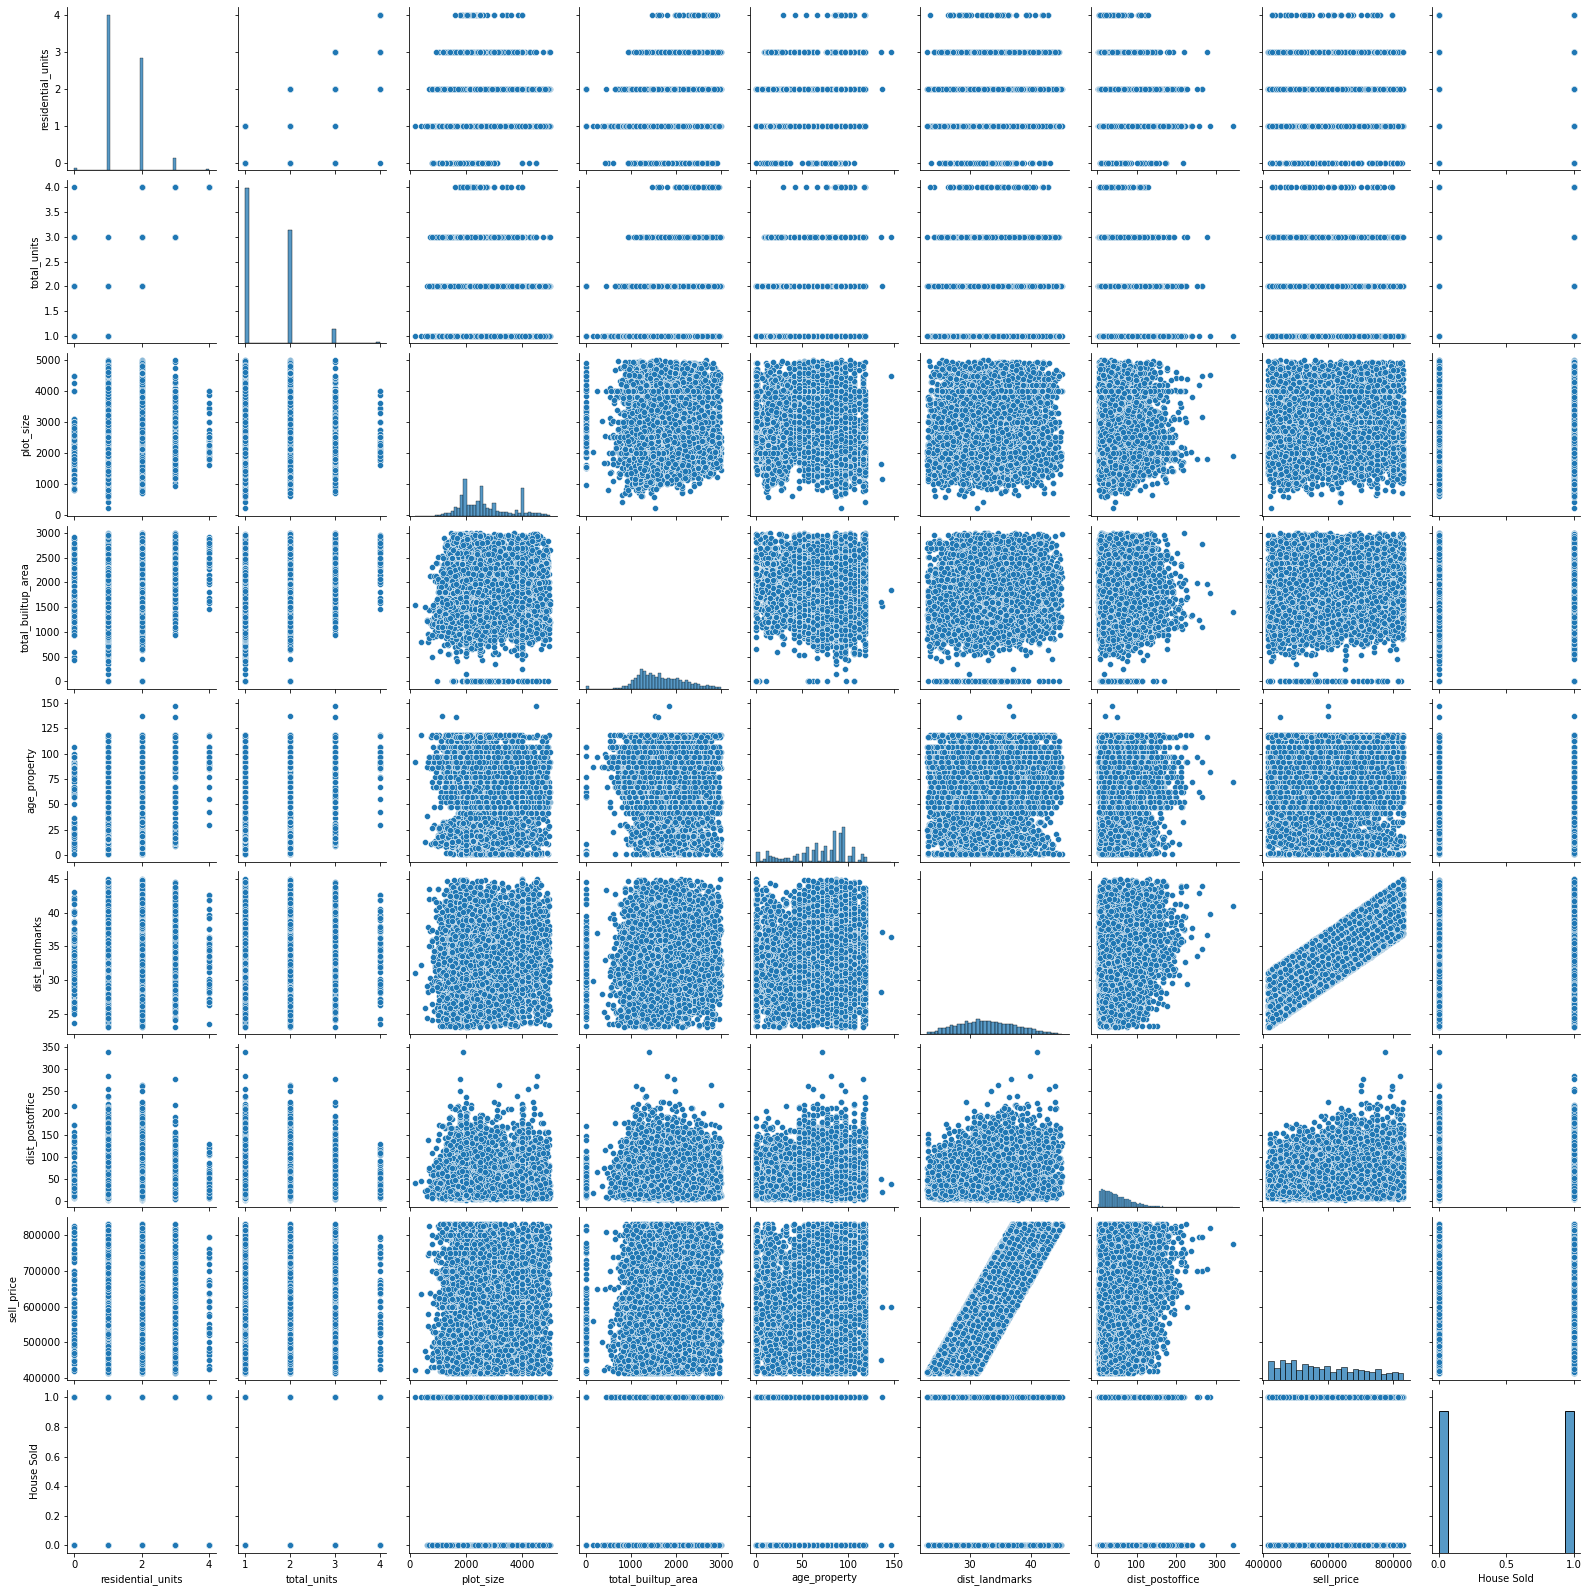

In [61]:
sns.pairplot(data)
plt.show() 

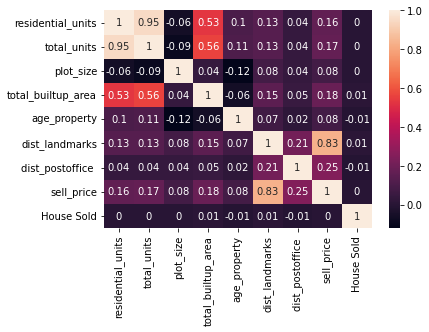

In [62]:
cor = data.corr().round(2)
sns.heatmap(cor, annot=True)
plt.show()

### Inferences- 

Top Positive Correlation Pairs  - 
1. residential_units and total_units (+0.95) 
2. dist_landmarks and sell_price (+0.83) 
3. total_builtup_area and total_units (Moderate correlation +0.56) 

Negative correlations are not significant, highest being -0.12 between age_property and plot_size. 

As we have seen, we have few pairs of features with significant positive correlations. We will perform Principal Component Analysis to handle the issue of Multicollinearity. PCA is also useful when the features are too many, and we want to reduce the feature set without losing a significant amount of information (variability). 

Lets first train a Linear Regression model on original features, and then compare the model perfromance with a Model trained on Optimum no. of Principal Components. 

### Linear Regression Model with original features -

### Simple Linear regression

In [63]:
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
  

In [64]:
y=data['sell_price']
model1= smf.ols(formula='sell_price ~ dist_landmarks',
                data=data).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sell_price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 2.478e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        22:17:58   Log-Likelihood:            -1.3584e+05
No. Observations:               10873   AIC:                         2.717e+05
Df Residuals:                   10871   BIC:                         2.717e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9.358e+04   4375.174    -21.388      0.000   -1.02e+05    -8.5e+04
dist_landmarks  2.074e+04    131.753    157.410      0.000    2.05e+04     2.1e+04
==============================================================================
Omnibus:                      539.287   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.991
Skew:                           0.071   Prob(JB):                     1.03e-48
Kurtosis:                       2.316   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking assumptions for SLRM
## Linearity


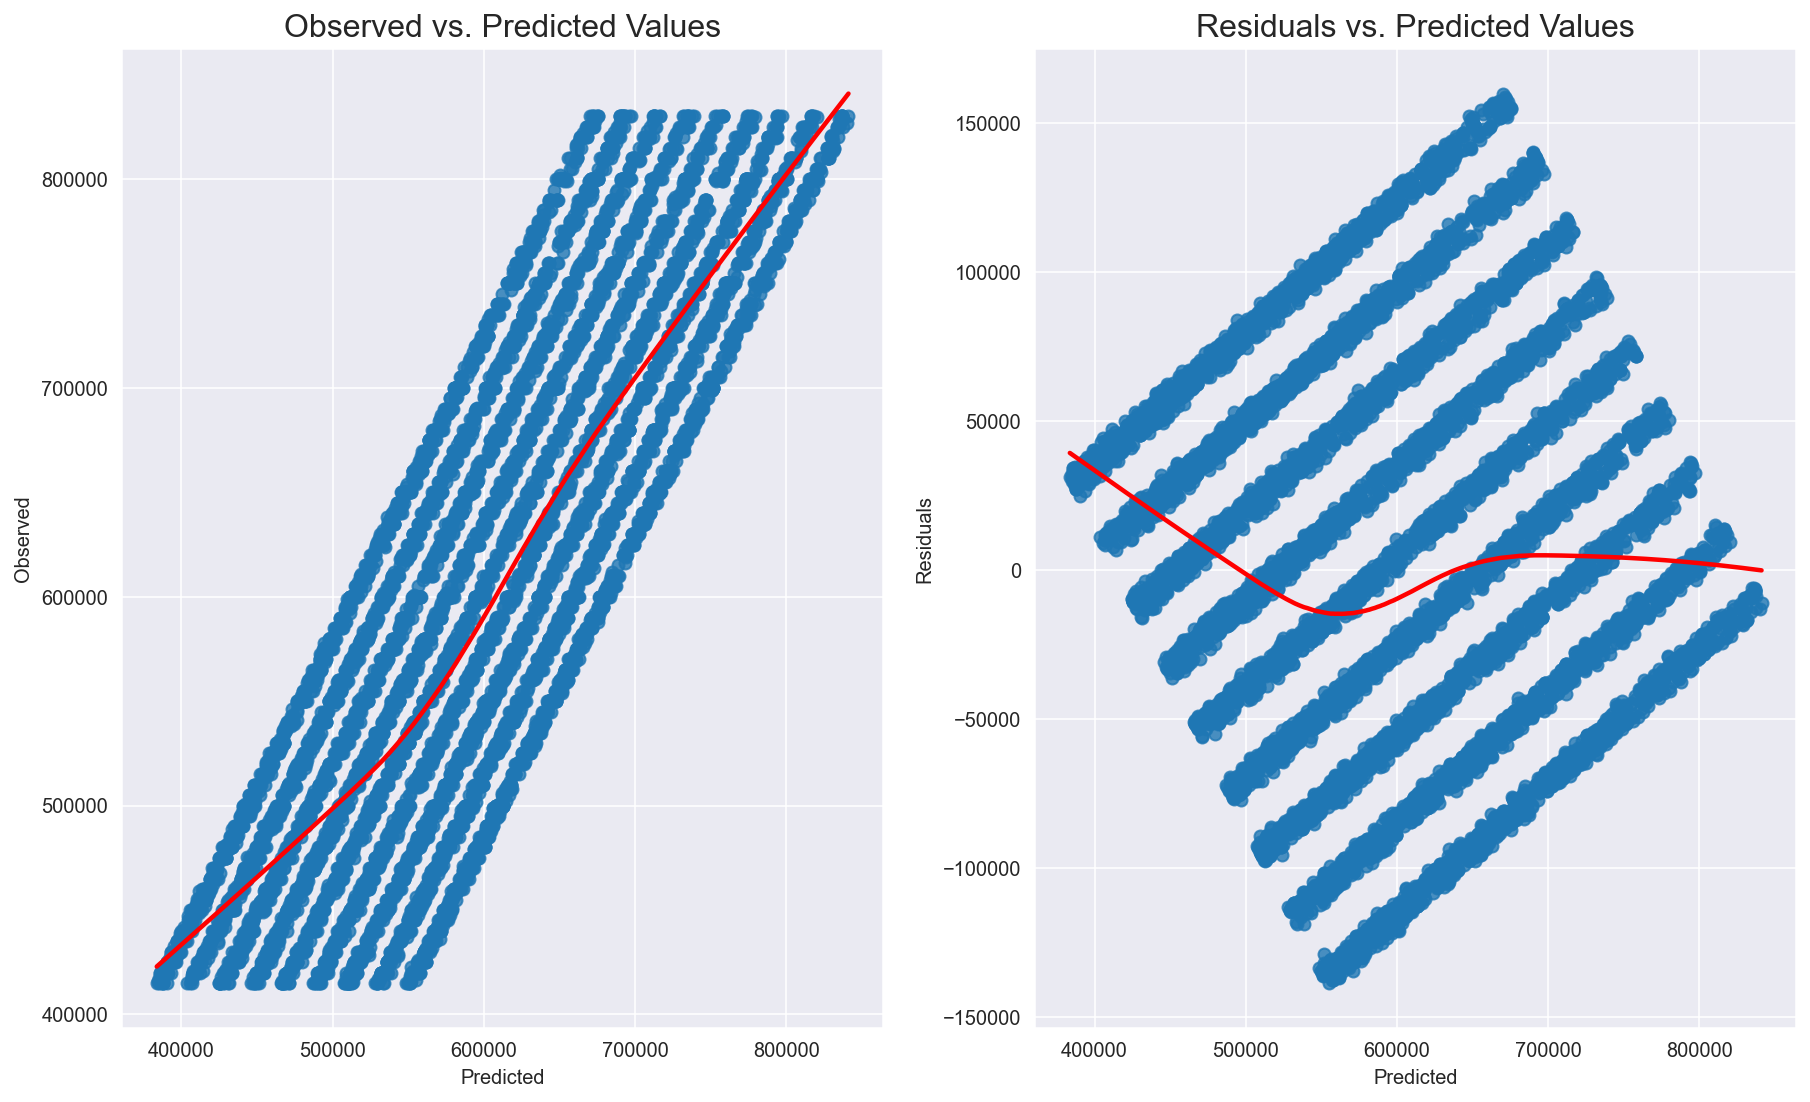

In [65]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model1, y)    
    

# Homoscadasticity


 Goldfeld-Quandt test ----
                value
F statistic  0.957262
p-value      0.946282

 Residuals plots ----


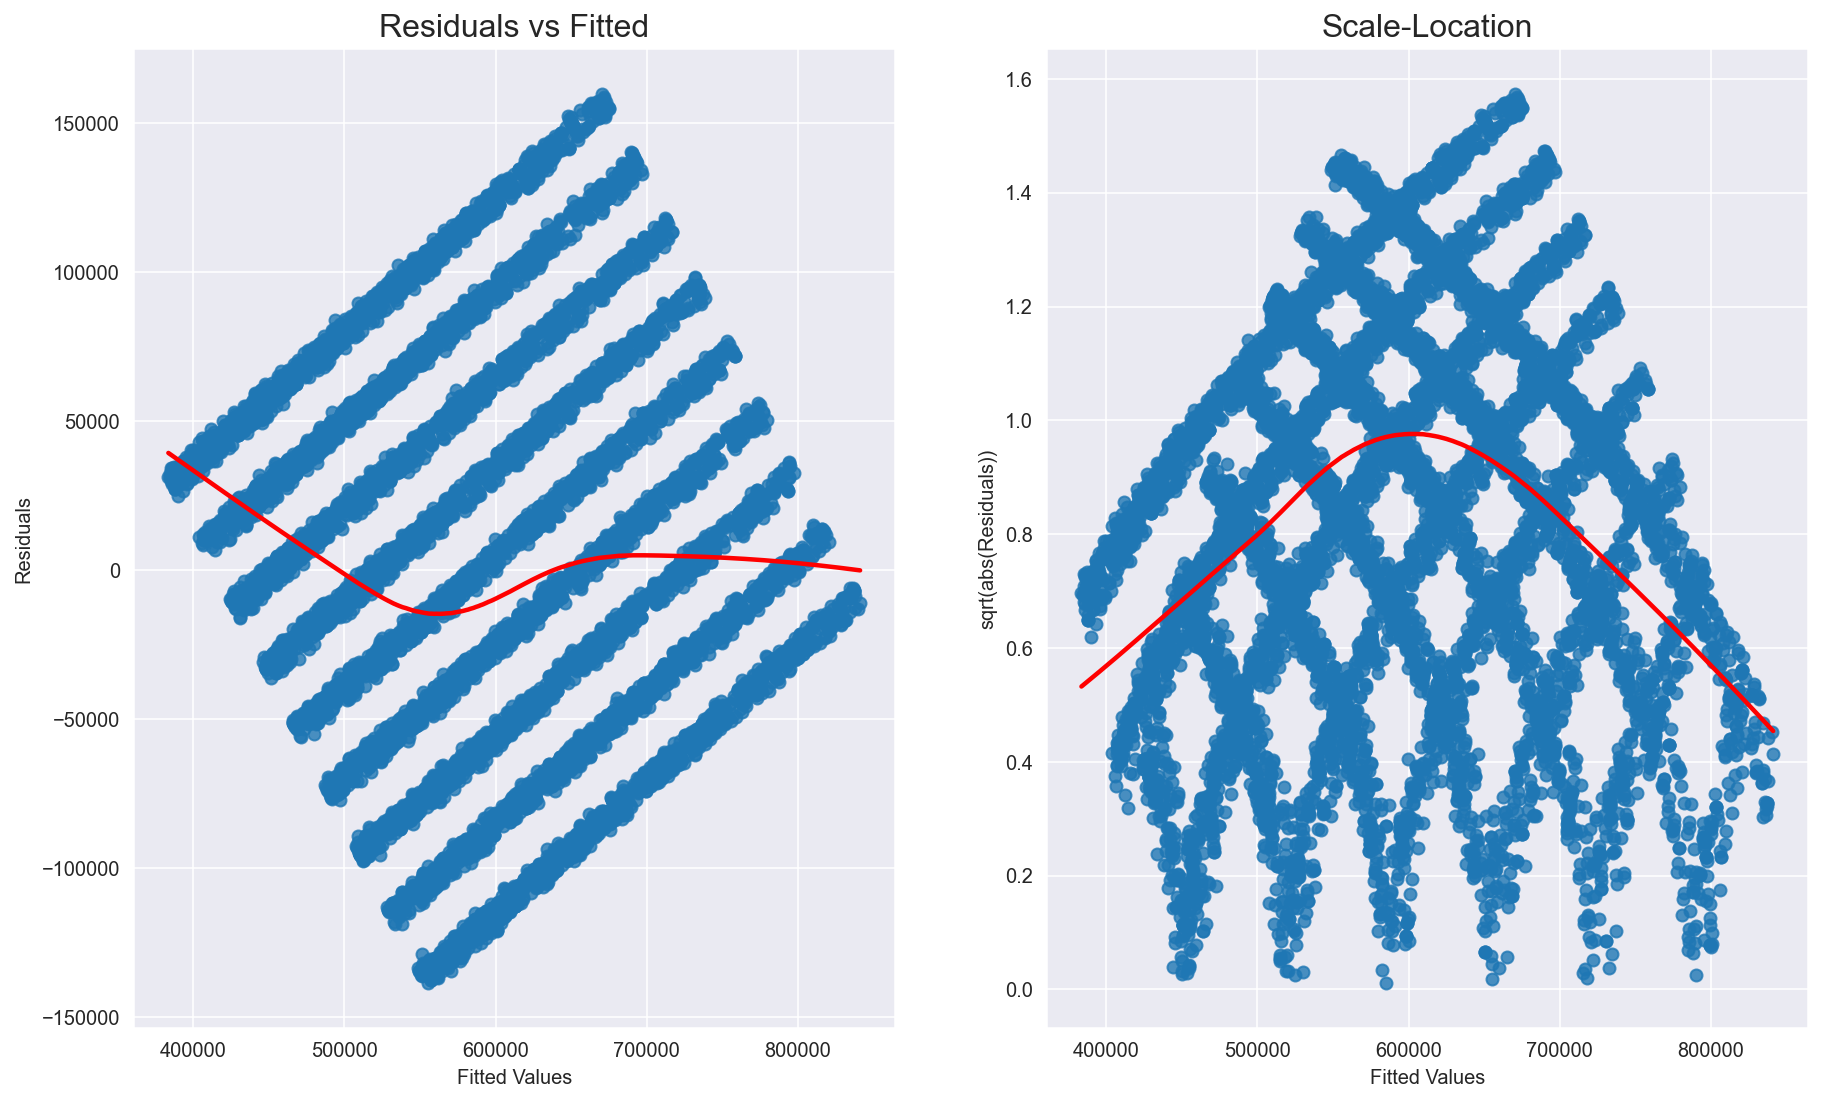

In [66]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model1)

# Autocorrelation

C:\Users\rouna\AppData\Local\Temp\ipykernel_17512\1386816879.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


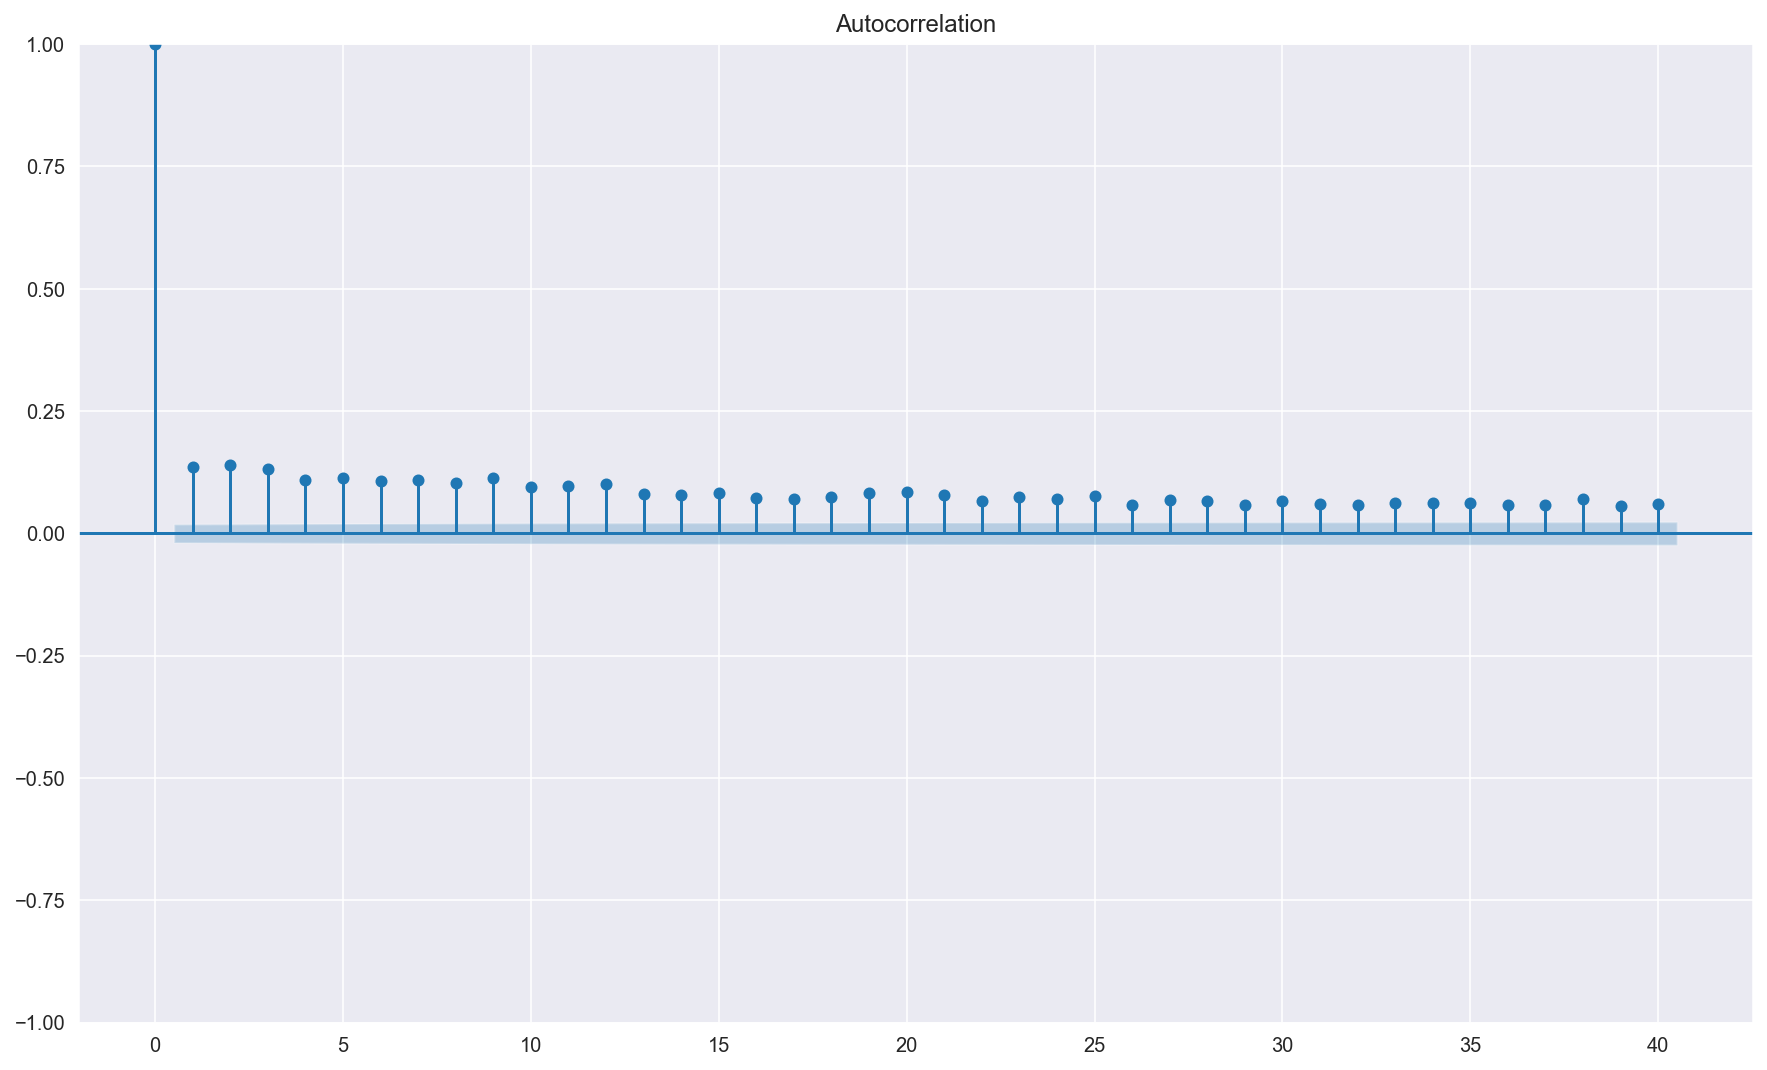

In [67]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model1.resid, lags=40 , alpha=0.05)
acf.show()

## Normality 

C:\Users\rouna\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Jarque-Bera test ---- statistic: 220.9914, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9896, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5011, p-value: 0.0000
Anderson-Darling test ---- statistic: 19.2710, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


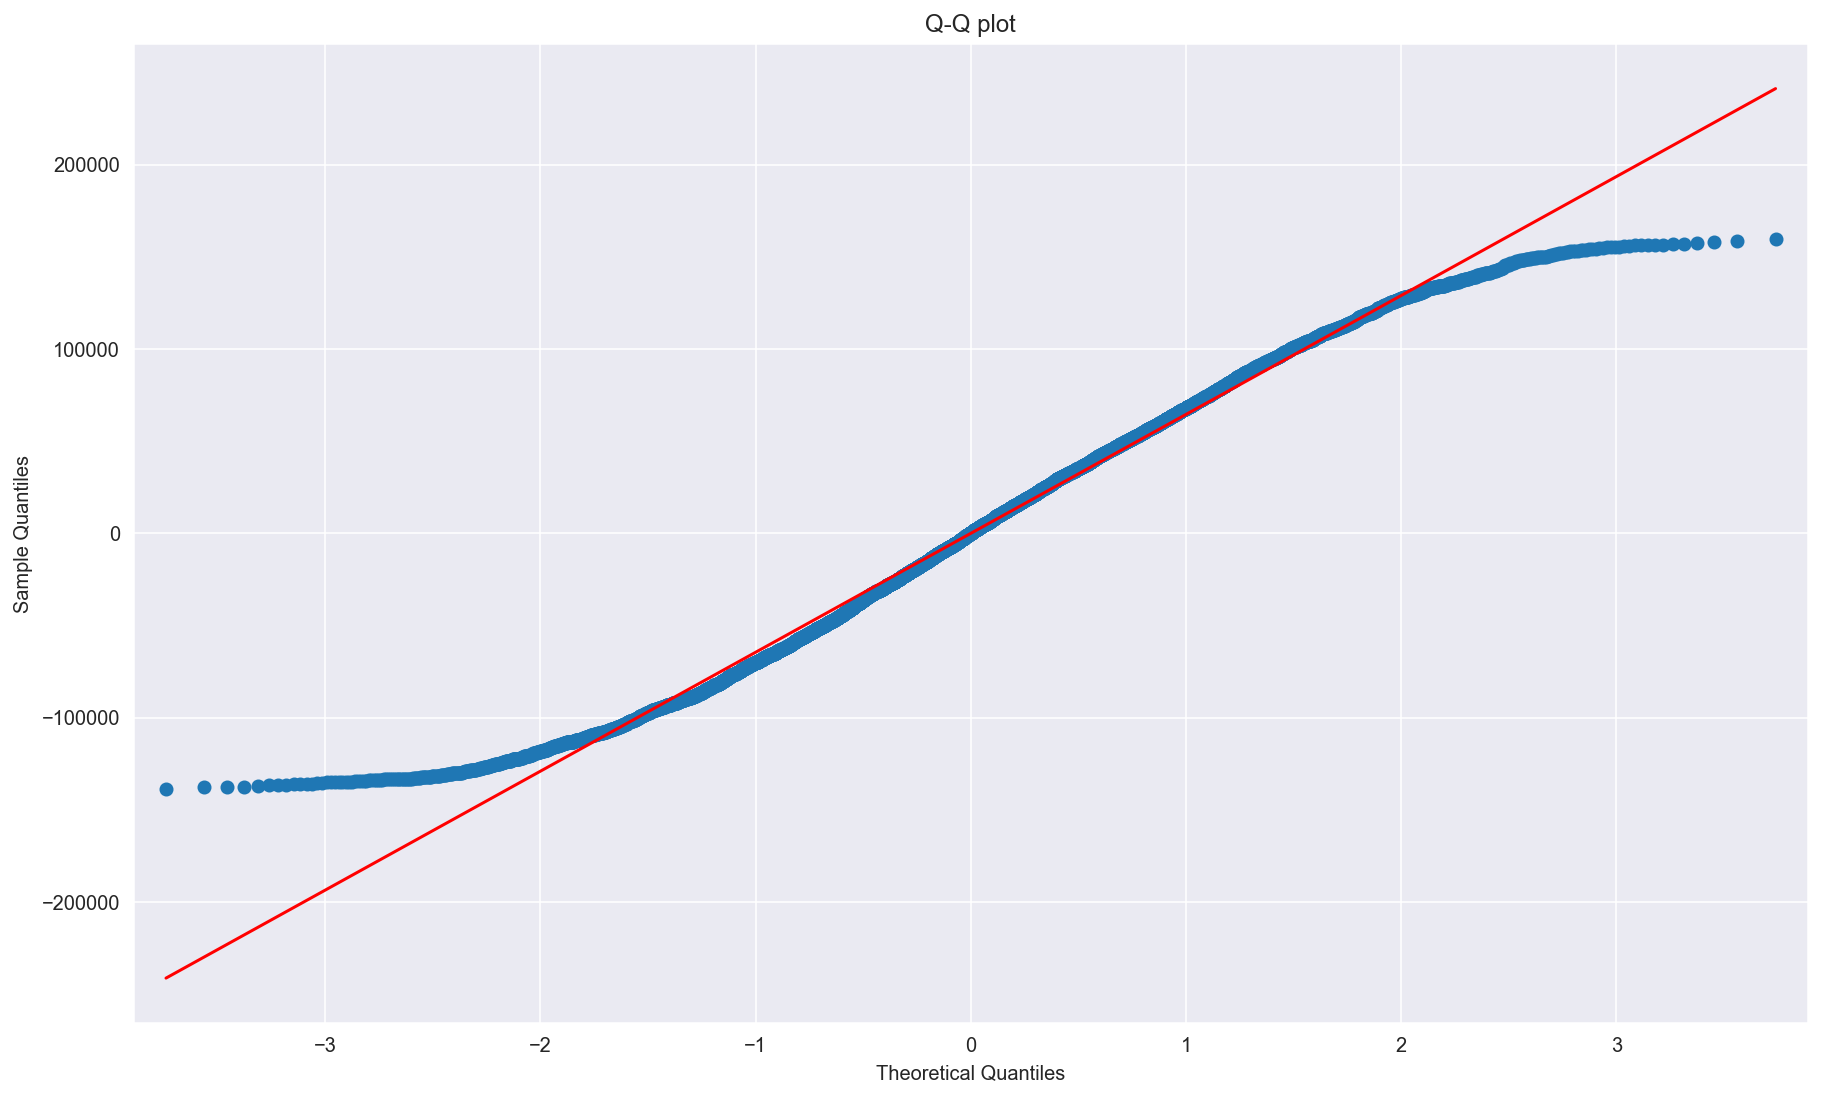

In [68]:
from scipy import stats
import statsmodels.graphics.gofplots as smg
from statsmodels.graphics.gofplots import ProbPlot

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    smg.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model1)



# Box- cox Transforamation

In [69]:
from scipy.stats import boxcox
bcx_target, lam = boxcox(data["dist_landmarks"])
#lam is the best lambda for the distribution
print(bcx_target)

[6.10345146 6.09704514 6.24334967 ... 5.46584604 6.09426177 5.6027095 ]


## Fitting model again

In [70]:
y=data['sell_price']
model1b= smf.ols(formula='sell_price ~ bcx_target',
                data=data).fit()
model1b.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sell_price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        22:18:41   Log-Likelihood:            -1.3601e+05
No. Observations:               10873   AIC:                         2.720e+05
Df Residuals:                   10871   BIC:                         2.720e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.076e+05   9733.389    -93.243      0.000   -9.27e+05   -8.88e+05
bcx_target  2.519e+05   1635.884    153.995      0.000    2.49e+05    2.55e+05
==============================================================================
Omnibus:                      672.487   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.489
Skew:                          -0.033   Prob(JB):                     4.93e-54
Kurtosis:                       2.267   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking Normality again

Jarque-Bera test ---- statistic: 245.4894, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9883, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5154, p-value: 0.0000
Anderson-Darling test ---- statistic: 27.1021, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


C:\Users\rouna\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


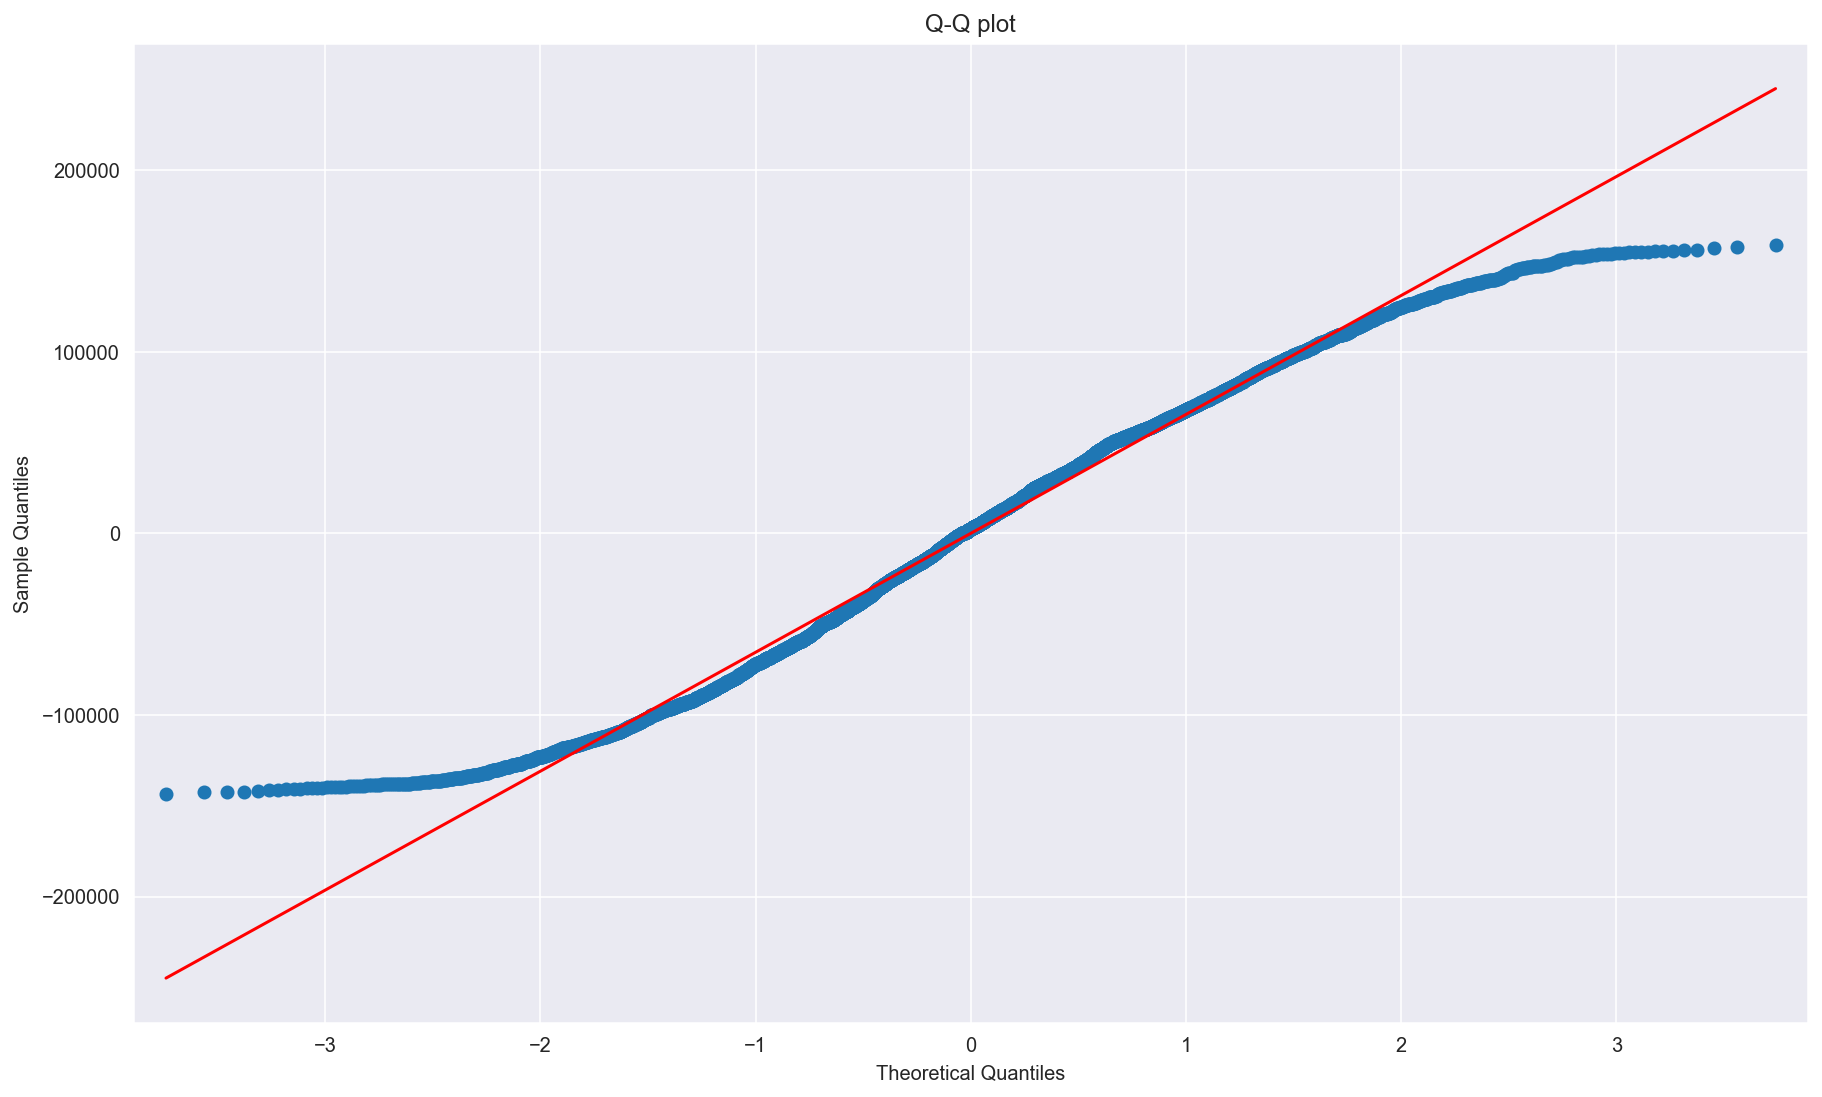

In [71]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    smg.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model1b)

# Multiple Linear Regression 

In [72]:
import statsmodels.api as smf
x = data[['residential_units','total_units','plot_size','total_builtup_area','age_property','dist_landmarks']]
y = data['sell_price'] 
x = smf.add_constant(x ) 
model2 = smf.OLS(y, x).fit() 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sell_price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     4216.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        22:18:42   Log-Likelihood:            -1.3576e+05
No. Observations:               10873   AIC:                         2.715e+05
Df Residuals:                   10866   BIC:                         2.716e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.184e+05   4990.477    -23.721      0.000   -1.28e+05   -1.09e+05
residential_units   -868.5981   3321.531     -0.262      0.794   -7379.405    5642.208
total_units         7339.4780   3434.768      2.137      0.033     606.706    1.41e+04
plot_size              2.1466      0.705      3.043      0.002       0.764       3.529
total_builtup_area     8.0812      1.460      5.535      0.000       5.219      10.943
age_property          90.2442     20.621      4.376      0.000      49.823     130.666
dist_landmarks      2.041e+04    133.478    152.942      0.000    2.02e+04    2.07e+04
==============================================================================
Omnibus:                      484.098   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.293
Skew:                           0.081   Prob(JB):                     3.57e-46
Kurtosis:                       2.340   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linearity

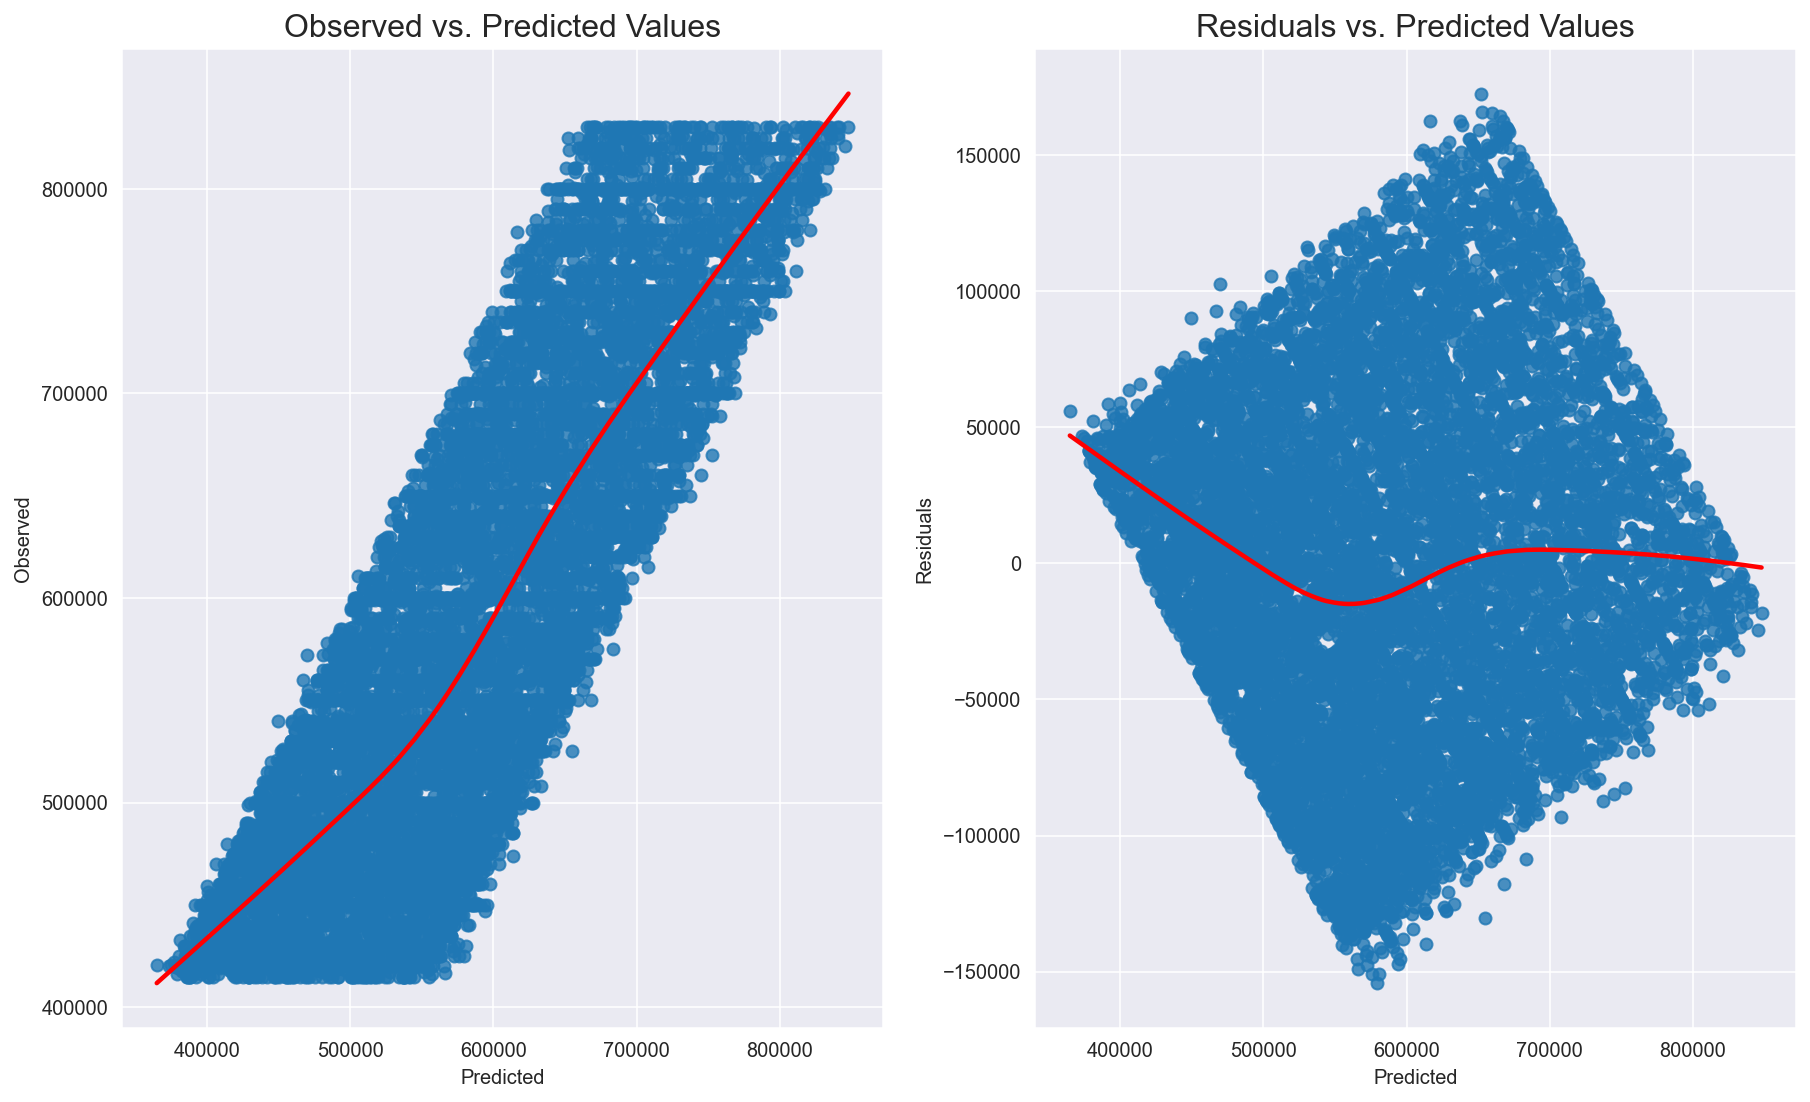

In [73]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model2, y)    

## Homoscedasticity


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  9.890935e+01
p-value                        4.236931e-19
f-value                        1.662552e+01
f p-value                      3.484852e-19

 Goldfeld-Quandt test ----
                value
F statistic  0.897883
p-value      0.999964

 Residuals plots ----


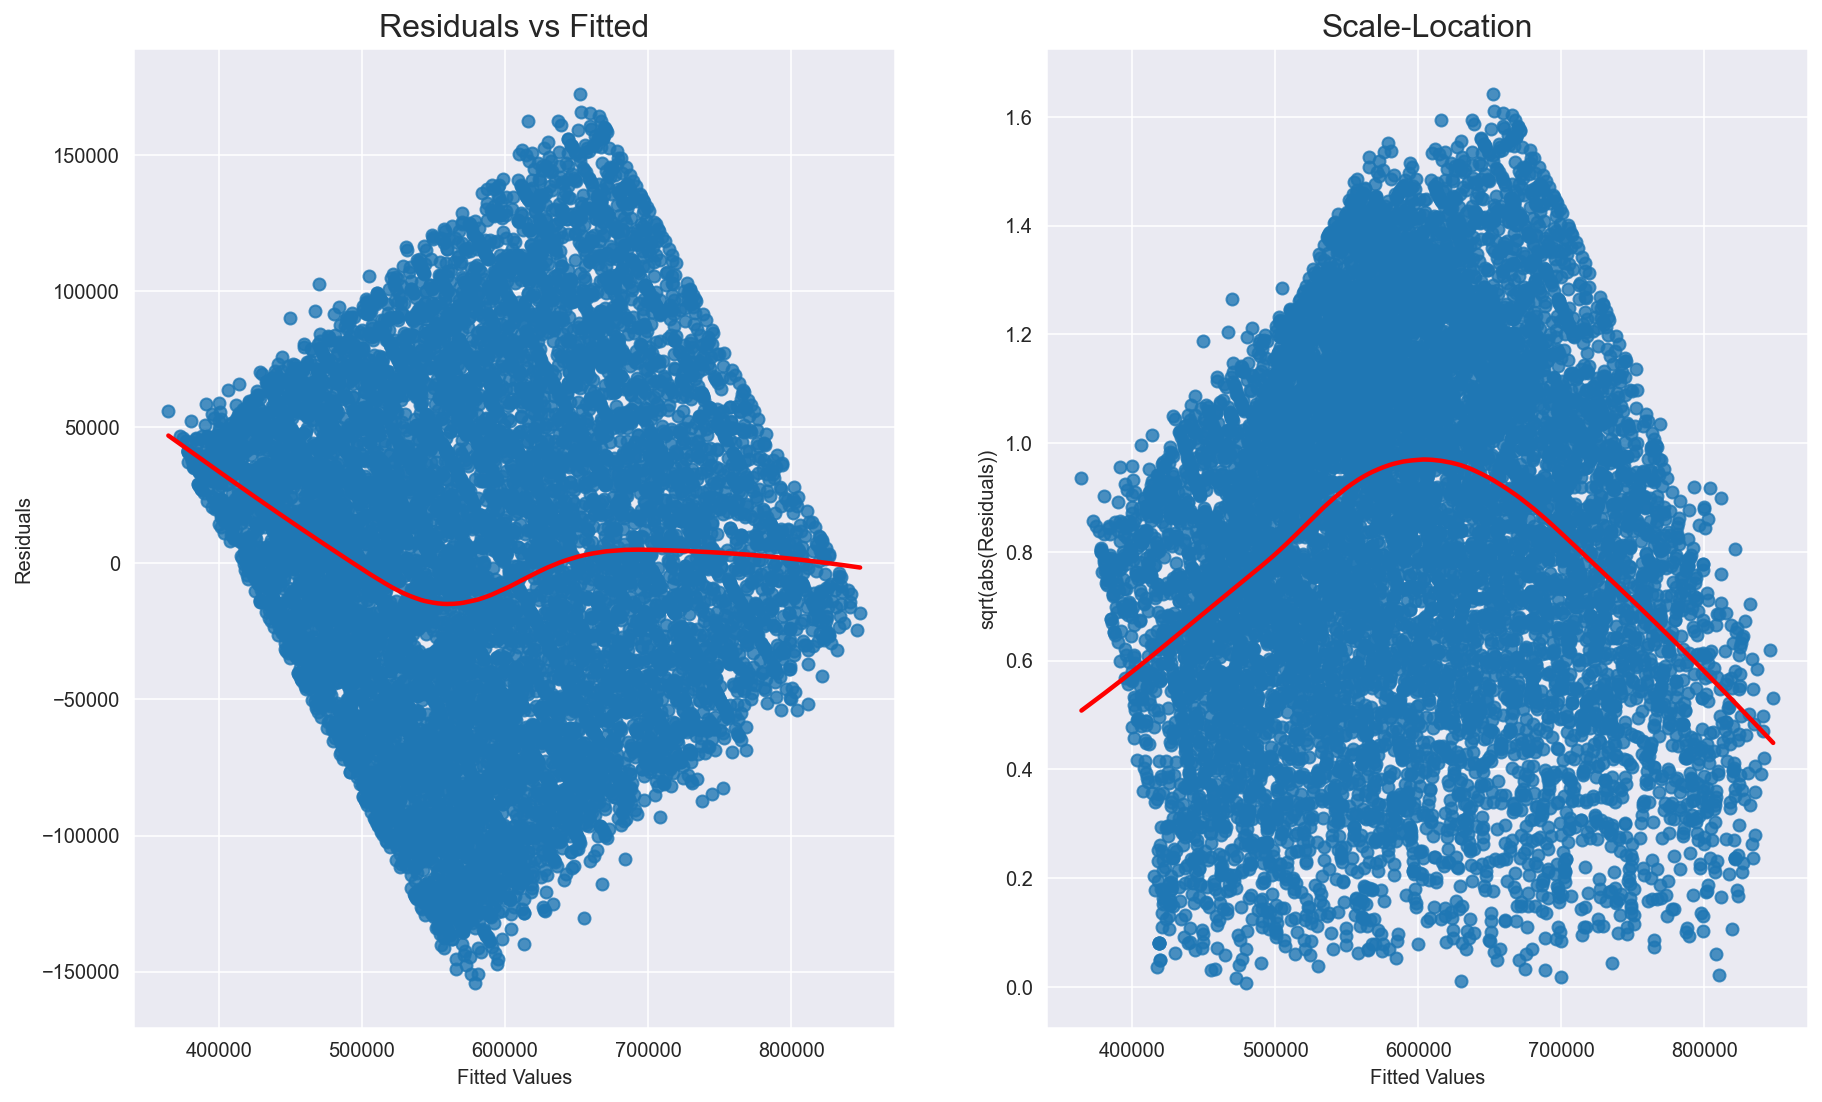

In [74]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model2)

## Normality

C:\Users\rouna\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Jarque-Bera test ---- statistic: 209.2928, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9907, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5003, p-value: 0.0000
Anderson-Darling test ---- statistic: 18.4489, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


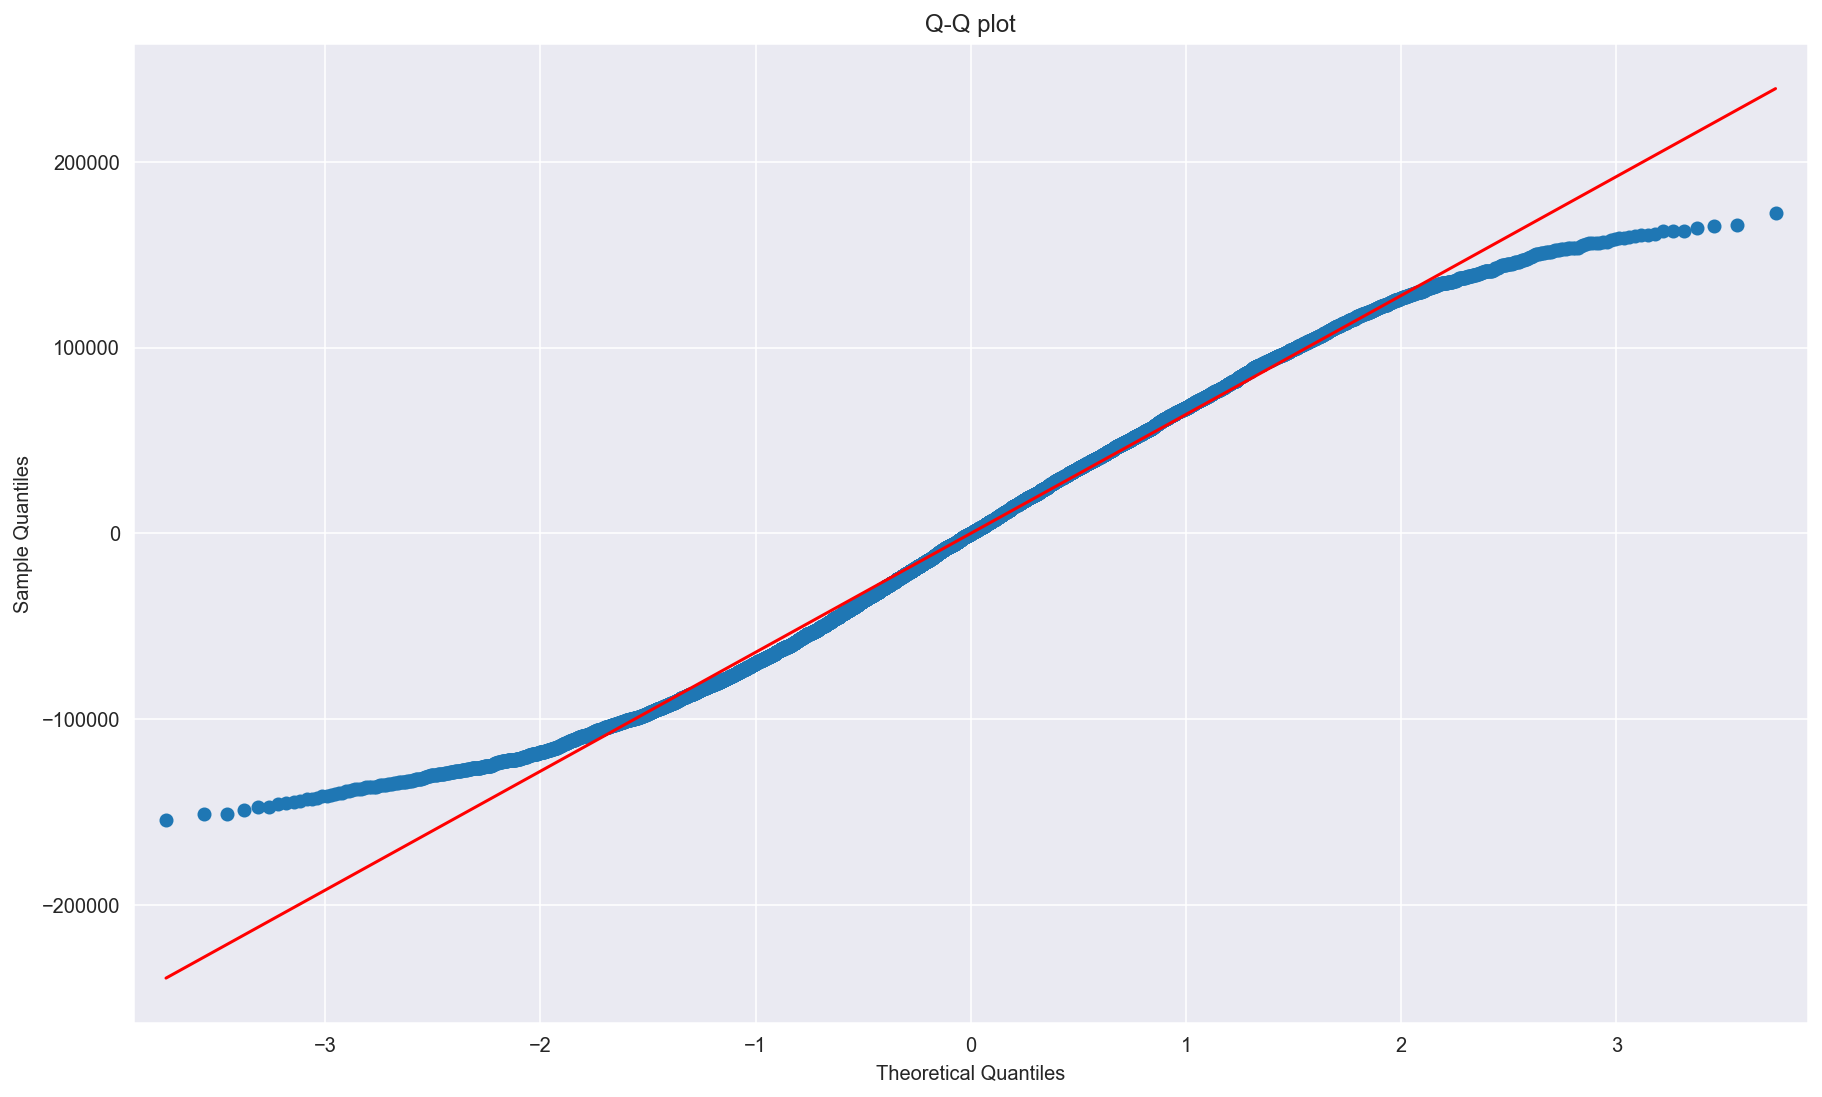

In [75]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    smf.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model2)

# Logistic Regression


In [76]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as smf
from sklearn.metrics import classification_report, confusion_matrix


In [77]:
y1=data['House Sold']
X1=data['dist_landmarks'] 

In [78]:
import statsmodels.api as sm
model3=sm.Logit(y1,X1)
result=model3.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.693143
         Iterations 2
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: House Sold       AIC:              15075.0814
Date:               2023-05-04 22:19 BIC:              15082.3755
No. Observations:   10873            Log-Likelihood:   -7536.5   
Df Model:           0                LL-Null:          -7536.6   
Df Residuals:       10872            LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     2.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
dist_landmarks   0.0002    0.0006  0.3117  0.7552  -0.0010  0.0013



In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# create some example data
X1 = data['dist_landmarks']
y1 = data['House Sold']

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Predict the target values
y_pred = model3.predict(X1)

# Compute the confusion matrix
cm = confusion_matrix(y1, y_pred)

# Print the confusion matrix
print(cm)



ValueError: shapes (10873,1) and (10873,) not aligned: 1 (dim 1) != 10873 (dim 0)

In [84]:
# Reshape the params parameter
params_reshaped = result.params.reshape(1, -1)

# Predict the target values for X1
y_pred = result.predict(params=params_reshaped, exog=X1)

# Compute the confusion matrix
cm = confusion_matrix(y1, y_pred.round())

# Print the confusion matrix
print(cm)

AttributeError: 'Series' object has no attribute 'reshape'